## Contents

* [Normalize data](#normalize-data)

* [Daily Page Views](#daily-page-views)

* [Average Page Views](#average-page-views)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Normalize data

In [9]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

In [10]:
df = df[
    (df['value'] >= df['value'].quantile(0.025))
    & (df['value'] <= df['value'].quantile(0.975))
]

In [11]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


## Daily Page Views

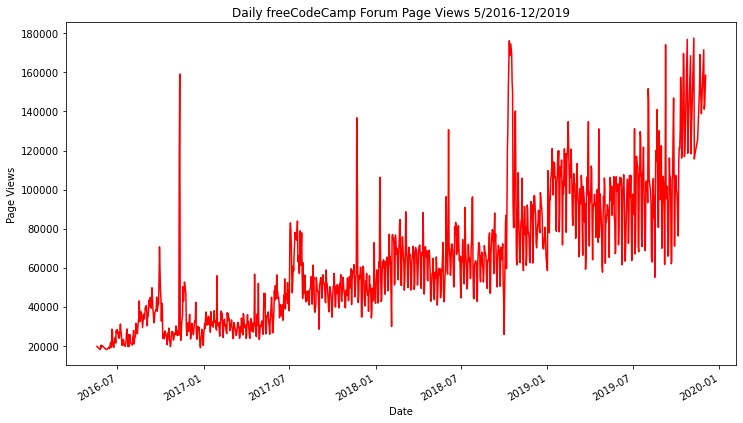

In [12]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(7)

df['value'].plot(ax=ax, color='red')

ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
plt.show()

## Average Page Views

### Preparing data

In [19]:
df_bar = df.copy()
df_bar.reset_index(inplace=True)
df_bar['year'] = [d.year for d in df_bar.date]
df_bar['month'] = [d.strftime('%B') for d in df_bar.date]
df_bar_grouped = df_bar.groupby(by=['year', 'month'],  as_index=False).mean()

### Sorting data by month naturally

In [20]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_bar_grouped['month'] = pd.Categorical(df_bar_grouped['month'], categories=months, ordered=True)
df_bar_grouped.sort_values(by='month', inplace=True)

### Result

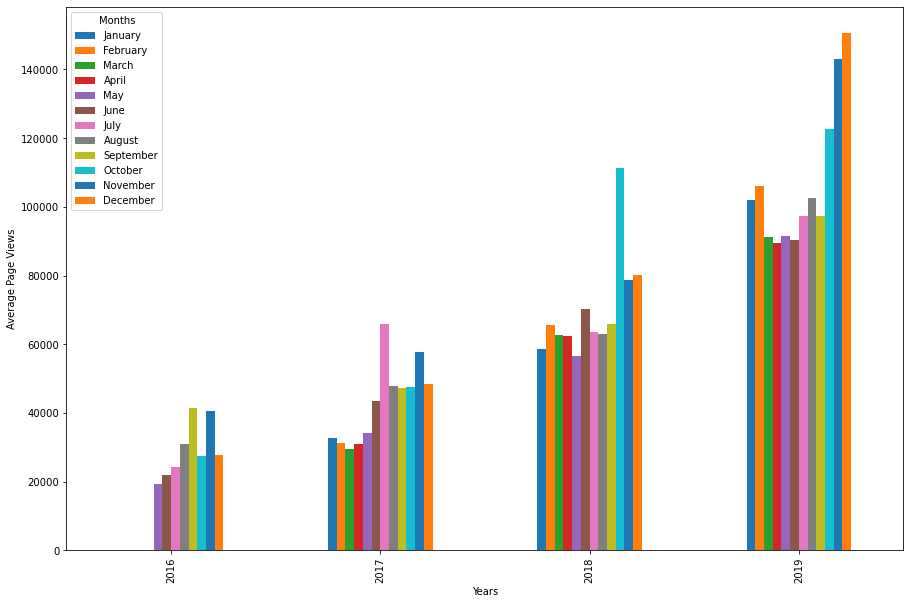

In [21]:
df_bar_pivoted = df_bar_grouped.pivot(index='year', columns='month', values='value')

fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)

df_bar_pivoted.plot.bar(ax=ax)

ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.legend(title='Months', loc='upper left')
plt.show()